In [1]:
# Kmeans code from scratch

# Steps
# 1. Decide number of clusters
# 2. Select random centroids
# 3. Assign Clusters
# 4. Move centroids
# 5. Check finish

In [40]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random
import numpy as np

In [28]:
class KMeans:
  def __init__(self, n_clusters=2, max_iter=100):
    self.n_clusters = n_clusters # 1. Decide number of clusters
    self.max_iter = max_iter
    self.centroids = None

  def fit_predict(self,X):
    # 2. Select random centroids
    random_idx = random.sample(range(0,X.shape[0]), self.n_clusters)
    self.centroids = X[random_idx]


    for i in range(self.max_iter):
      # 3. Assign Clusters
      cluster_group = self.assign_clusters(X)
      old_centroids = self.centroids
      # 4. Move Centroids
      self.centroids = self.move_centroids(X,cluster_group)
      # 5. Check finish
      if (old_centroids == self.centroids).all():
        break

  def assign_clusters(self,X):
    cluster_group = []
    distances = []

    for row in X:
      for centroid in self.centroids:
        distances.append(np.sqrt(np.dot(row-centroid, row-centroid)))
      min_distance = min(distances)
      index_position = distances.index(min_distance)
      cluster_group.append(index_position)
      distances.clear()

    return np.array(cluster_group)

  def move_centroids(self,X,cluster_group):
    new_centroid = []
    cluster_type = np.unique(cluster_group) # to find out the number of clusters

    for type in cluster_type:
      new_centroid.append(X[cluster_group == type].mean(axis=0))

    return np.array(new_centroid)


In [41]:
centroids = [(-5,5), (5,5)]
cluster_std = [1,1]

In [42]:
X,y = make_blobs(n_samples=100, cluster_std=cluster_std, centers=centroids, n_features=2, random_state=42)

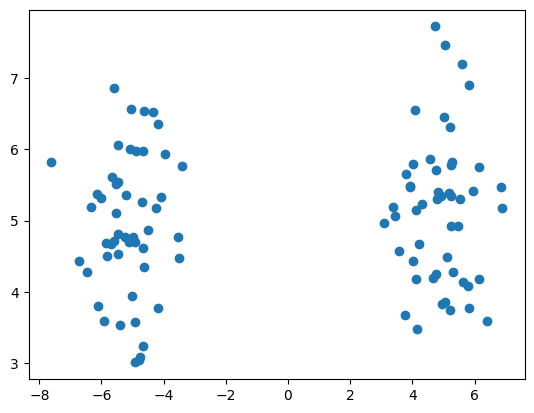

In [43]:
plt.scatter(X[:,0],X[:,1])
plt.show()

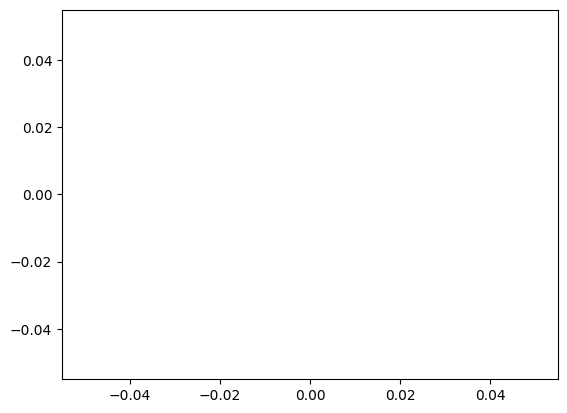

In [46]:
# Calling the function
km = KMeans(n_clusters=2, max_iter=100)
y_means = km.fit_predict(X)
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], color='red')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], color='blue')
plt.show()
